# Link to Other Indicators

In [188]:
import pandas as pd

In [189]:
lcd = pd.read_csv("lcdi/lcdi_index.csv")

In [190]:
country_name_mapping = {
    "Bahamas, The": "Bahamas",
    "Bolivia": "Bolivia (Plurinational State of)",
    "Brunei": "Brunei Darussalam",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Congo, Democratic Republic of the": "Democratic Republic of the Congo",
    "The Democratic Republic of the Congo": "Democratic Republic of the Congo",
    "Democratic Republic of Congo": "Democratic Republic of the Congo",
    "Congo, Rep.": "Congo",
    "Congo, Republic of": "Congo",
    "Cape Verde": "Cabo Verde",
    "Cote d'Ivoire": "Côte d’Ivoire",
    "Ivory Coast": "Côte d’Ivoire",
    "Czech Republic": "Czechia",
    "Gambia, The": "Gambia",
    "Korea, Rep.": "Republic of Korea",
    "Korea, Republic of": "Republic of Korea",
    "South Korea": "Republic of Korea",
    "Korea, Dem. People's Rep.": "Democratic People's Republic of Korea",
    "North Korea": "Democratic People's Republic of Korea",
    "Iran, Islamic Rep.": "Iran (Islamic Republic of)",
    "Iran": "Iran (Islamic Republic of)",
    "Lao PDR": "Lao People's Democratic Republic",
    "Lao": "Lao People's Democratic Republic",
    "Laos": "Lao People's Democratic Republic",
    "Micronesia, Fed. Sts.": "Micronesia (Federated States of)",
    "Micronesia": "Micronesia (Federated States of)",
    "Micronesia (country)": "Micronesia (Federated States of)",
    "Moldova": "Republic of Moldova",
    "Palestine, State of": "State of Palestine",
    "St. Kitts and Nevis": "Saint Kitts and Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Turkiye": "Turkey",
    "Tanzania": "United Republic of Tanzania",
    "Venezuela, RB": "Venezuela",
    "Yemen, Rep.": "Yemen",
    "Syria": "Syrian Arab Republic",
    "Egypt, Arab Rep.": "Egypt",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Slovak Republic": "Slovakia",
    "Russia": "Russian Federation",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
    "United States": "United States of America",
    "East Timor": "Timor-Leste",
    "Vietnam": "Viet Nam",
    "Venezuela": "Venezuela (Bolivarian Republic of)",
    "Venezuela, RB": "Venezuela (Bolivarian Republic of)",
    "West Bank and Gaza": "State of Palestine",
    "Palestine": "State of Palestine",
    "Türkiye": "Turkey",
}

## Sustainable Development Goals Index

In [191]:
sdg = pd.read_csv("dataset/sdg_index.csv")

In [192]:
sdg.loc[:, 'Country'] = sdg['Country'].replace(country_name_mapping)
sdg = sdg.rename(columns={'Country': 'country'})

In [193]:
from functools import reduce

In [194]:
dfs = [sdg, lcd]
merge_dfs = lambda left, right: pd.merge(left, right, on='country', how='inner')
combined_df = reduce(merge_dfs, dfs)
combined_df.head()

,country,2023 SDG Index Score,2023 SDG Index Rank,rank,region,environmental_score,socioeconomic_score,governance_score,lcdci
0,Finland,86.8,1,4.0,WEOG,0.885223,0.942,0.965217,0.916514
1,Sweden,86.0,2,2.0,WEOG,0.894651,0.952,0.982609,0.927151
2,Denmark,85.7,3,7.0,WEOG,0.846441,0.952,0.982609,0.903046
3,Germany,83.4,4,19.0,WEOG,0.793880,0.950,0.982609,0.876016
4,Austria,82.3,5,9.0,WEOG,0.857549,0.926,0.965217,0.896676


In [195]:
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import numpy as np

KeyError: 'lcdi'

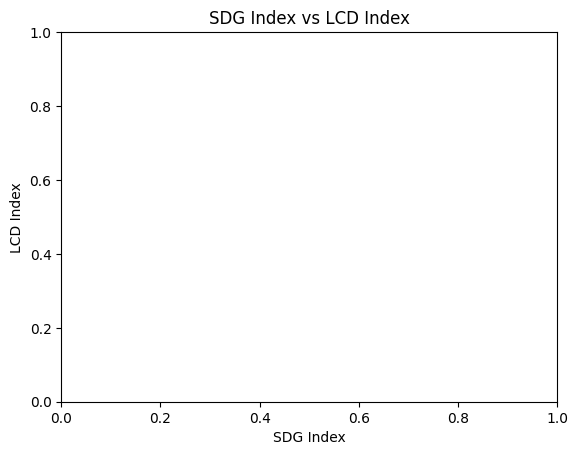

In [196]:
plt.title("SDG Index vs LCD Index")
plt.xlabel("SDG Index")
plt.ylabel("LCD Index")
plt.scatter(combined_df['2023 SDG Index Score'], combined_df['lcdi'])
plt.plot(np.unique(combined_df['2023 SDG Index Score']), np.poly1d(np.polyfit(combined_df['2023 SDG Index Score'], combined_df['lcdi'], 1))(np.unique(combined_df['2023 SDG Index Score'])))

In [ ]:
corr = pearsonr(combined_df['2023 SDG Index Score'], combined_df['lcdi'])
corr

PearsonRResult(statistic=0.7192624577860506, pvalue=6.819923810787463e-28)

Result: Significant strong positive correlation (71.9%)

## Environmental Performance Index

In [ ]:
epi = pd.read_csv("dataset/YALE-EPI.csv")

In [ ]:
epi = epi[epi['Indicator ID'].isin(['YALE.EPI.EPI'])]
epi = epi[['Economy Name', '2022']]
epi.head()

,Economy Name,2022
36,Afghanistan,43.6
84,Angola,30.5
139,Albania,47.1
214,United Arab Emirates,52.4
266,Argentina,41.1


In [ ]:
epi = epi.rename(columns={'Economy Name': 'country'})
epi.loc[:, 'country'] = epi['country'].replace(country_name_mapping)

In [ ]:
dfs = [epi, lcd]
merge_dfs = lambda left, right: pd.merge(left, right, on='country', how='inner')
combined_df = reduce(merge_dfs, dfs)
combined_df.head()

,country,2022,rank,region,environmental_score,socioeconomic_score,governance_score,lcdci
0,Afghanistan,43.6,184.0,Asia-Pacific Group,0.817781,0.462,0.826087,0.685402
1,Angola,30.5,182.0,African Group,0.887705,0.591,0.260870,0.698086
2,Albania,47.1,49.0,Eastern European Group,0.860867,0.789,0.965217,0.846961
3,United Arab Emirates,52.4,35.0,Asia-Pacific Group,0.787643,0.937,0.947826,0.863675
4,Argentina,41.1,58.0,GRULAC,0.796867,0.849,0.965217,0.837461


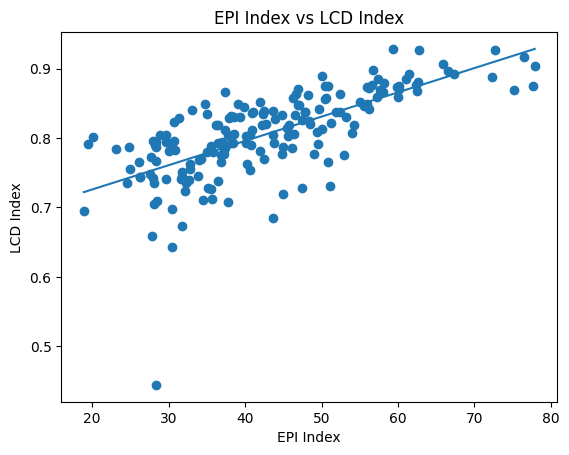

In [ ]:
plt.title("EPI Index vs LCD Index")
plt.xlabel("EPI Index")
plt.ylabel("LCD Index")
plt.scatter(combined_df['2022'], combined_df['lcdi'])
plt.plot(np.unique(combined_df['2022']), np.poly1d(np.polyfit(combined_df['2022'], combined_df['lcdi'], 1))(np.unique(combined_df['2022'])))

In [ ]:
corr = pearsonr(combined_df['2022'], combined_df['lcdi'])
corr

PearsonRResult(statistic=0.6940257369966956, pvalue=4.741601032135433e-27)

Result: Significant strong positive correlation (69.4%)